In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.manifold import TSNE
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose

In [2]:
from scripts.architecture import MLP, MLPManual
from scripts.train import *
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy, fillSubplot
from scripts.notebook_utils import *

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [4]:
print(torch.__version__)
print(np.__version__)

1.9.1
1.20.3


## Create Parity Data Iterator

In [5]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

# doesn't perform and transformation until we call the loader
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

/home/john/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630815121/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_type = "Binary Cross Entropy"
loss_fn = torch.nn.BCELoss()
B_initialization = "uniform"
optim = "SGD"
momentum, nesterov_momentum = False, False
weight_decay = 1e-3
measure_alignment = False

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### For k = 1

In [ ]:
k=1
model = MLP(k, "ReLU", loss_type)
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = weight_decay)

trainLostList_Ada1, trainAccList_Ada1, valLossList_Ada1, valAccList_Ada1  = train_model(model, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, 
                                                                                        batch_size, validate_model = True, performance=accuracy, device=device, 
                                                                                        lr_scheduler=None, updateWManually=False)

plot_loss_accuracy(trainLostList_Ada1,valLossList_Ada1,trainAccList_Ada1,valAccList_Ada1,num_epochs)

In [ ]:
model2 = MLP(k, "ReLU", loss_type)
optimizer = torch.optim.SGD(model2.parameters(), lr=learn_rate, weight_decay=weight_decay)

trainLostList_sgd1, trainAccList_sgd1, valLossList_sgd1, valAccList_sgd1  = train_model(model2, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, 
                                                                                        batch_size, validate_model = True, performance=accuracy, device=device,lr = learn_rate, 
                                                                                        lr_scheduler=None, updateWManually=False)

In [ ]:
k=1
modelManual = MLPManual(k, learn_rate, loss_type, "BP", None, optim, device, measure_alignment, False)

trainLostList_sgd1_scratch, trainAccList_sgd1_scratch, \
valLossList_sgd1_scratch, valAccList_sgd1_scratch,_,_,_  = train_model_manually(modelManual, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, validate_model = True, device=device)

In [ ]:
modelManualDFA = MLPManual(k, learn_rate, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
trainLostList_sgd1_dfa, trainAccList_sgd1_dfa, \
valLossList_sgd1_dfa, valAccList_sgd1_dfa,_,_,_  =  train_model_manually(modelManualDFA, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, validate_model = True, device=device)


### For k = 3

In [ ]:
k = 3
model3 = MLP(k,"ReLU", loss_type)
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay=weight_decay)

trainLostList_Ada3, trainAccList_Ada3, \
valLossList_Ada3, valAccList_Ada3  = train_model(model3, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, batch_size, validate_model = True, 
                                                 performance=accuracy, device=device, lr_scheduler=None)

plot_loss_accuracy(trainLostList_Ada3,valLossList_Ada3,trainAccList_Ada3,valAccList_Ada3,num_epochs)

In [ ]:
model4 = MLP(k, "ReLU", loss_type)
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate, weight_decay=weight_decay)

trainLostList_sgd3, trainAccList_sgd3, valLossList_sgd3, valAccList_sgd3  = train_model(model4, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, 
                                                                                        batch_size, validate_model = True, performance=accuracy, device=device, 
                                                                                        lr_scheduler=None)

In [ ]:
modelManual3 = MLPManual(k, learn_rate, loss_type, "BP", None, optim, device, measure_alignment, False)
trainLostList_sgd3_scratch, trainAccList_sgd3_scratch, \
valLossList_sgd3_scratch, valAccList_sgd3_scratch,_,_,_  = train_model_manually(modelManual3, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, validate_model = True, device=device)

In [ ]:
learn_rate = 0.02 # one of the best lr that I got for uniform B, with 0.05 training didn't perform well
modelManual3DFA = MLPManual(k, learn_rate, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
trainLostList_sgd3_dfa, trainAccList_sgd3_dfa, \
valLossList_sgd3_dfa, valAccList_sgd3_dfa,_,_,_  = train_model_manually(modelManual3DFA, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, validate_model = True, device=device)

In [ ]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16,8))

ax1.plot(range(1,21),valAccList_sgd1, color = "blue", label = "SGD BP Pytorch") 
ax1.plot(range(1,21),valAccList_Ada1, color = "green", label = "Adadelta BP Pytorch")
ax1.plot(range(1,21),valAccList_sgd1_scratch, color = "orange", label = "SGD BP Dogan") 
ax1.plot(range(1,21),valAccList_sgd1_dfa, color = "red", label = "SGD DFA Dogan")
ax1.set_ylim(0.40,1.05)
ax1.set_title("Test Accuracy k=1")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(range(1,21))
ax1.legend()
ax1.grid(True)


ax3.plot(range(1,21),valAccList_sgd3, color = "blue", label = "SGD BP Pytorch")
ax3.plot(range(1,21),valAccList_Ada3, color = "green", label = "Adadelta BP Pytorch")
ax3.plot(range(1,21),valAccList_sgd3_scratch, color = "orange", label = "SGD BP Dogan")
ax3.plot(range(1,21),valAccList_sgd3_dfa, color = "red", label = "SGD DFA Dogan")
ax3.set_ylim(0.40,1.05)
ax3.set_title("Test Accuracy k=3")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Accuracy")
ax3.set_xticks(range(1,21))
ax3.legend()
ax3.grid(True)

fig.savefig("plots/k13_SGD_Ada_BP_DFA.png")

### Try with the same weights (SGD BP Pytorch vs SGD BP Dogan)

In [ ]:
k = 3
modelx = MLP(k, "ReLU", loss_type).to(device)

w1 = copy.deepcopy(modelx.state_dict()["layer1.weight"]).to(device)
w2 = copy.deepcopy(modelx.state_dict()["layer2.weight"]).to(device)

optimizer = torch.optim.SGD(modelx.parameters(), lr=learn_rate)

trainLostList_sgd3_w, trainAccList_sgd3_w, valLossList_sgd3_w, valAccList_sgd3_w = train_model(modelx, k, trainset, testset, loss_type, loss_fn, optimizer, num_epochs, 
                                                                                                batch_size, validate_model = True, performance=accuracy, device=device, 
                                                                                                lr=learn_rate, lr_scheduler=None, updateWManually=True)

In [ ]:
modelManualx = MLPManual(k, learn_rate, loss_type, "BP", None, optim, device, measure_alignment, (w1.t(),w2.t()))
trainLostList_sgd3_scratch_w, trainAccList_sgd3_scratch_w, \
valLossList_sgd3_scratch_w, valAccList_sgd3_scratch_w, _,_,_  = train_model_manually(modelManualx, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, validate_model = True, device=device)

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,21),valAccList_sgd3_w, color = "blue", label = "BP SGD Pytorch")
plt.plot(range(1,21),valAccList_sgd3_scratch_w, color = "green", label = "BP SGD Dogan")

plt.ylim(0.4,1.05)
plt.title("Test Accuracy k=3")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.legend()
plt.grid(True)

plt.savefig("plots/k3_SGD_BP_sameWeights.png")

plt.show();

# They are gonna be different, because I recreate the data every epoch
# but the pattern should be very similar

### DFA Experiments

In [ ]:
# run DFA up to 50-100 epochs to see if we get similar result as BP
k=3
learn_rate = 0.01
measure_alignment_DFA = True
modelManual4 = MLPManual(k, learn_rate, loss_type, "DFA", B_initialization, optim, device, measure_alignment_DFA, False)
trainLostList_sgad4_scratch, trainAccList_sgd4_scratch, \
valLossList_sgd4_scratch, valAccList_sgd4_scratch, \
similarity_w2B, similarity_w1_grads, similarity_w2_grads  = train_model_manually(modelManual4, k, trainset, testset, loss_type, loss_fn, 100, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment_DFA, validate_model = True, device=device)
plt.figure(figsize=(16,8))                                                                          
plotValAccuracy(valAccList_sgd4_scratch, 100, "DFA Validation", 3)

In [ ]:
# Get the results for DFA and BP by running three times
k = 3
num_epochs = 50
measure_alignment = True
loss_type = "Binary Cross Entropy"
learn_rate = 0.015

df_gen = pd.DataFrame(columns=["epoch", "DFA SGD", "Alignment"])

for i in range(1,4):    

    modelManualDFA = MLPManual(k, learn_rate, loss_type, "DFA", "uniform", "SGD", device, measure_alignment, False)
    trainLostList_dfa, trainAccList_dfa, valLossList_dfa, valAccList_dfa , \
    similarity_w2B, similarity_w1_grads, similarity_w2_grads  =                 train_model_manually(modelManualDFA, k, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                                                    batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                                                                    validate_model = True, device=device)

    df = pd.DataFrame()
    df["epoch"] = list(range(1,51))
    df["DFA SGD"] = valAccList_dfa
    df["Alignment"] = similarity_w2B

    df_gen = df_gen.append(df, ignore_index=True)

df_gen.to_csv("runs/K3_SGD_DFA50epochs.csv")        

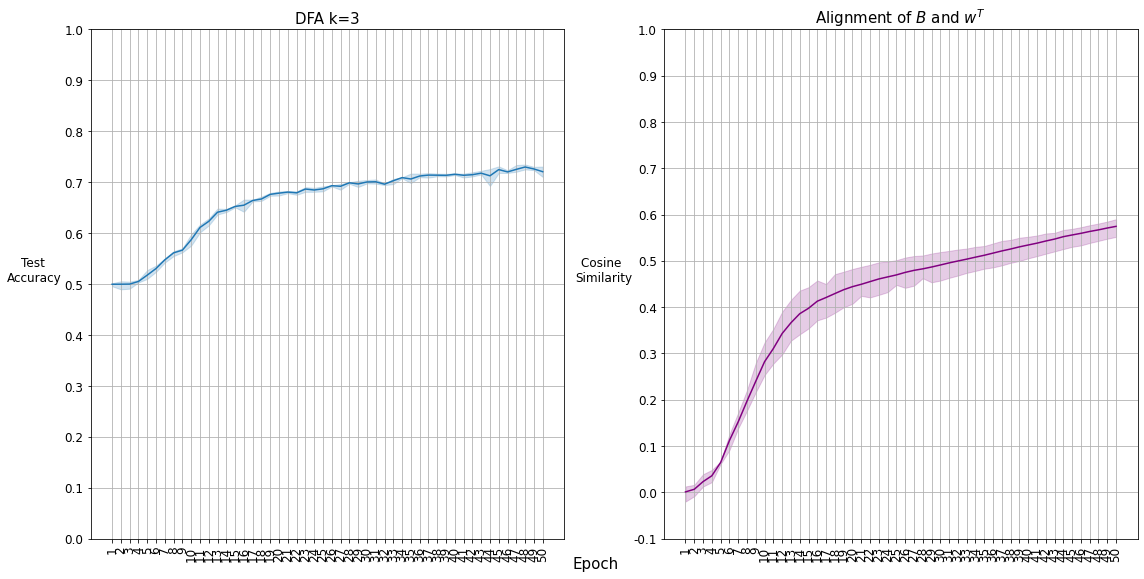

In [7]:
df_gen = pd.read_csv("runs/K3_SGD_DFA50epochs.csv")

fig, (ax1,  ax3) = plt.subplots(1, 2, figsize=(16,8))

ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
tickLabels = map(str, ticks)

ticks2 = [-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
tickLabels2 = map(str, ticks2)

ax1 = sns.lineplot(data=df_gen, x="epoch", y="DFA SGD", ax=ax1)
ax1.set_ylim(0.0,1.0)
ax1.set_title("DFA k=3", fontsize = 15)
ax1.set_ylabel("Test \nAccuracy", rotation=0, fontsize=12, labelpad=30)
ax1.set_xlabel("")
ax1.set_xticks(range(1,51))
ax1.set_yticks(ticks)
ax1.set_yticklabels(tickLabels)
ax1.grid(True)
# ax1.tick_params(labelrotation=90)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)


ax3 = sns.lineplot(data=df_gen, x="epoch", y="Alignment", color="purple", ax=ax3)
ax3.set_ylim(-0.1,1.0)
ax3.set_title("Alignment of $B$ and $w^T$", fontsize = 15)
h2 = ax3.set_ylabel("Cosine \nSimilarity", rotation=0, fontsize=12, labelpad=30)
h2.set_rotation(0)
ax3.set_xlabel("")
ax3.set_xticks(range(1,51))
ax3.set_yticks(ticks2)
ax3.set_yticklabels(tickLabels2)
ax3.tick_params(labelrotation=90)
ax3.grid(True)
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)
for tick in ax3.get_yticklabels():
    tick.set_rotation(0)

plt.tight_layout()
fig.supxlabel('Epoch', x = 0.52, y = 0, fontsize = 15)
fig.savefig("plots/k3_SGD_DFA_Alingment.png");


### Alignment

In [ ]:
fig, (ax1,  ax3, ax4) = plt.subplots(1, 3, figsize=(16,8))

ax1.plot(similarity_w2B)
ax1.set_title("w2.T() and B Cosine Similarity")
ax1.grid(True)

ax3.plot(similarity_w1_grads)
ax3.set_title("W1 Grad Cosine Similarity")
ax3.grid(True)

ax4.plot(similarity_w2_grads)
ax4.set_title("W2 Grad Similarity")
ax4.grid(True)

fig.supxlabel('Epoch', fontsize = 15)

### Hyperparameter Tuning

In [ ]:
# k = 3
# torch_bp_sgd_lr_array_ = np.linspace(0.05, 0.15, 6)
# torch_bp_ada_lr_array = np.linspace(0.10, 0.20, 6)

# best_torch_bp_sgd = tuneLearningRate_Torch(torch_bp_sgd_lr_array_, "SGD", k, loss_type)
# best_torch_bp_ada = tuneLearningRate_Torch(torch_bp_ada_lr_array, "Adadelta", k, loss_type)

In [8]:
best_torch_bp_sgd = 0.11
best_torch_bp_ada = 0.18

In [ ]:
# manual_bp_sgd_lr_array = np.linspace(0.01, 0.07, 6)
# manual_bp_adagrad_lr_array = np.linspace(0.005, 0.01, 6)
# manual_bp_adadelta_lr_array = np.linspace(0.1, 1, 6)
# manual_bp_rmsprop_lr_array = np.linspace(0.0001, 0.0005, 6)
# manual_bp_adam_lr_array = np.linspace(0.001, 0.005, 6)


# best_manual_bp_sgd = tuneLearningRate_Manual(manual_bp_sgd_lr_array, "BP", None, "SGD", k, loss_type)
# best_manual_bp_adagrad = tuneLearningRate_Manual(manual_bp_adagrad_lr_array, "BP", None, "Adagrad", k, loss_type)
# best_manual_bp_adadelta = tuneLearningRate_Manual(manual_bp_adadelta_lr_array, "BP", None, "Adadelta", k, loss_type)
# best_manual_bp_rmsprop = tuneLearningRate_Manual(manual_bp_rmsprop_lr_array, "BP", None, "RMSProp", k, loss_type)
# best_manual_bp_adam = tuneLearningRate_Manual(manual_bp_adam_lr_array, "BP", None, "Adam", k, loss_type)

In [9]:
best_manual_bp_sgd = 0.08
best_manual_bp_adagrad = 0.007
best_manual_bp_adadelta = 1
best_manual_bp_rmsprop = 0.00026
best_manual_bp_adam = 0.0042

In [ ]:
# Tune their learning rates to get best one, it is done by checking the last 10 val Accuracy
# k=3
# lr_array_uni = np.linspace(0.01, 0.025, 6)
# lr_array_std_uni = np.linspace(0.0015, 0.0035, 6)
# lr_array_gauss = np.linspace(0.01, 0.02, 6)
# lr_array_std_gauss = np.linspace(0.0005, 0.001, 6)

# best_manual_dfa_sgd_uni = tuneLearningRate(lr_array_uni, "DFA", "uniform", optim, k, loss_type)
# best_manual_dfa_sgd_std_uni = tuneLearningRate(lr_array_std_uni, "DFA", "standard uniform", optim, k, loss_type)
# best_manual_dfa_sgd_gaussian = tuneLearningRate(lr_array_gauss, "DFA", "gaussian", optim, k, loss_type)
# best_manual_dfa_sgd_std_gaussian = tuneLearningRate(lr_array_std_gauss, "DFA", "standard gaussian", optim, k, loss_type)

In [10]:
# tuning these parameters take too much time, so let's run once and store them statically
best_manual_dfa_sgd_uni = 0.019
best_manual_dfa_sgd_std_uni = 0.0025
best_manual_dfa_sgd_gaussian = 0.01
best_manual_dfa_sgd_std_gaussian = 0.001

In [ ]:
# Tune their learning rates to get best one, it is done by checking the last 10 val Accuracy
# k=3

# lr_array_adagrad = np.linspace(0.001, 0.005, 6)
# lr_array_adadelta = np.linspace(0.1, 1, 6)
# lr_array_rmsprop = np.linspace(0.0004, 0.0006, 6)
# lr_array_adam = np.linspace(0.001, 0.003, 6)

# best_manual_dfa_adagrad_uni = tuneLearningRate_Manual(lr_array_adagrad, "DFA", B_initialization, "Adagrad", k, loss_type)
# best_manual_dfa_adadelta_uni = tuneLearningRate_Manual(lr_array_adadelta, "DFA", B_initialization, "Adadelta", k, loss_type)    
# best_manual_dfa_rmsprop_uni = tuneLearningRate_Manual(lr_array_rmsprop, "DFA", B_initialization, "RMSProp", k, loss_type)
# best_manual_dfa_adam_uni = tuneLearningRate_Manual(lr_array_adam, "DFA", B_initialization, "Adam", k, loss_type)

In [11]:
best_manual_dfa_adagrad_uni = 0.003
best_manual_dfa_adadelta_uni = 1
best_manual_dfa_rmsprop_uni = 0.00035
best_manual_dfa_adam_uni = 0.0018

### Random Matrix Experiments

In [ ]:
# Get the results for DFA and BP by running three times
k = 3
num_epochs = 20
measure_alignment = False
loss_type = "Binary Cross Entropy"

df_gen = pd.DataFrame(columns=["epoch", "standard uniform", "uniform", "standard gaussian", "gaussian"])

for i in range(1,4):    

    modelManualDFA_uni = MLPManual(k, best_manual_dfa_sgd_uni, loss_type, "DFA", "uniform", "SGD", device, measure_alignment, False)
    modelManualDFA_std_uni = MLPManual(k, best_manual_dfa_sgd_std_uni, loss_type, "DFA", "standard uniform", "SGD", device, measure_alignment, False)
    modelManualDFA_gauss = MLPManual(k, best_manual_dfa_sgd_gaussian, loss_type, "DFA", "gaussian", "SGD", device, measure_alignment, False)
    modelManualDFA_std_gauss = MLPManual(k, best_manual_dfa_sgd_std_gaussian, loss_type, "DFA", "standard gaussian", "SGD", device, measure_alignment, False)


    _, _, _, valAccList_dfa_uni , _, _, _  = train_model_manually(modelManualDFA_uni, k, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                  batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                                  validate_model = True, device=device)

    _, _, _, valAccList_dfa_std_uni , _, _, _  = train_model_manually(modelManualDFA_std_uni, k, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                  batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                                  validate_model = True, device=device)

    _, _, _, valAccList_dfa_gauss , _, _, _  = train_model_manually(modelManualDFA_gauss, k, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                  batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                                  validate_model = True, device=device)    

    _, _, _, valAccList_dfa_std_gauss , _, _, _  = train_model_manually(modelManualDFA_std_gauss, k, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                  batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                                  validate_model = True, device=device)                                                     

    df = pd.DataFrame()
    df["epoch"] = list(range(1,21))
    df["uniform"] = valAccList_dfa_uni
    df["standard uniform"] = valAccList_dfa_std_uni
    df["gaussian"] = valAccList_dfa_gauss
    df["standard gaussian"] = valAccList_dfa_std_gauss

    df_gen = df_gen.append(df, ignore_index=True)

df_genv2 = df_gen.melt(id_vars=["epoch"], var_name="randommatrix", value_name="testaccuracy")
df_gen.to_csv("runs/K3_SGD_DFA_RandomMatrices.csv")        

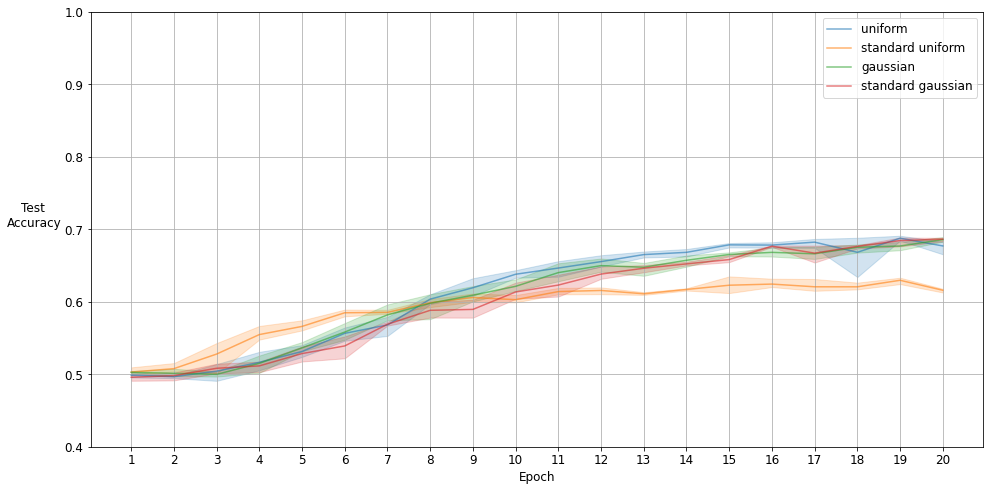

In [12]:
df_gen = pd.read_csv("runs/K3_SGD_DFA_RandomMatrices.csv")
g = sns.lineplot(data=df_gen, x="epoch", y="uniform", alpha=.6, label = "uniform")
g = sns.lineplot(data=df_gen, x="epoch", y="standard uniform", alpha=.6, label="standard uniform")
g = sns.lineplot(data=df_gen, x="epoch", y="gaussian", alpha=.6, label="gaussian")
g = sns.lineplot(data=df_gen, x="epoch", y="standard gaussian", alpha=.6, label="standard gaussian")

plt.grid()
plt.ylabel("Test \nAccuracy", fontsize=12, rotation=0, labelpad=30)
plt.xlabel("Epoch", fontsize=12)
plt.ylim(0.4,1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

In [ ]:
k=3
modelManualDFA_uni = MLPManual(k, best_manual_dfa_sgd_uni, loss_type, "DFA", "uniform", "SGD", device, measure_alignment, False)
modelManualDFA_std_uni = MLPManual(k, best_manual_dfa_sgd_std_uni, loss_type, "DFA", "standard uniform", "SGD", device, measure_alignment, False)
modelManualDFA_gauss = MLPManual(k, best_manual_dfa_sgd_gaussian, loss_type, "DFA", "gaussian", "SGD", device, measure_alignment, False)
modelManualDFA_std_gauss = MLPManual(k, best_manual_dfa_sgd_std_gaussian, loss_type, "DFA", "standard gaussian", "SGD", device, measure_alignment, False)

df = pd.DataFrame(columns = ["Random Matrix", "Optimizer", "Results"])
idx = 0
for model in [modelManualDFA_uni, modelManualDFA_std_uni, modelManualDFA_gauss, modelManualDFA_std_gauss]:
    liste = getMeanStd(model,k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, 
                       momentum, nesterov_momentum, weight_decay, measure_alignment, True, device)
    random_Matrix = model.B_initialization
    optim = model.optim
    for value in liste:
        df.loc[idx,:] = [random_Matrix,optim,value]
        idx += 1

df["Error"] = df["Results"].apply(lambda x: 1-x)
df.to_csv("runs/k3_DFA_RandomMatrices.csv")

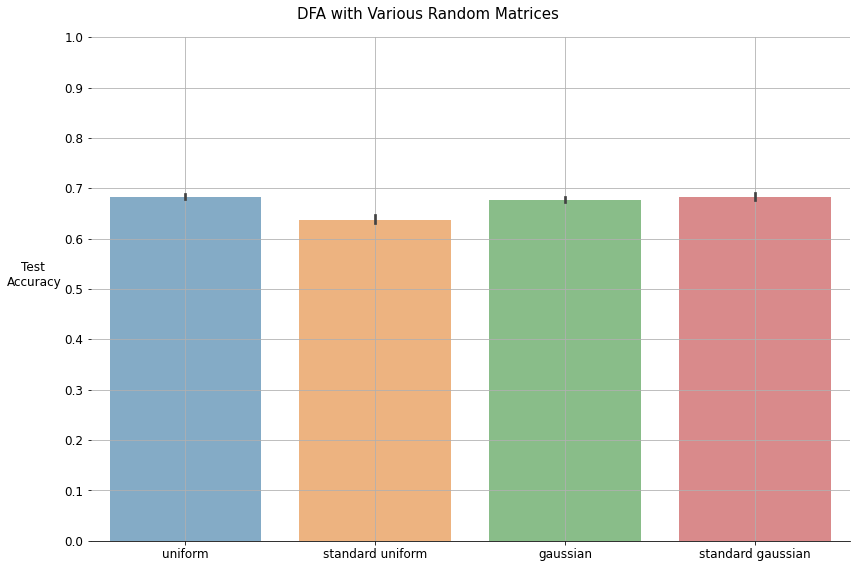

In [13]:
df = pd.read_csv("runs/k3_DFA_RandomMatrices.csv")

ticks = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
tickLabels = map(str, ticks)

g = sns.catplot(
    data=df, kind="bar",
    x="Random Matrix", y="Results", alpha=.6)
g.despine(left=True)
g.set_axis_labels("", "Test \nAccuracy", fontsize=12, rotation=0, labelpad=30)
g.fig.suptitle("DFA with Various Random Matrices", fontsize = 15)
g.fig.set_size_inches(12,8)
plt.grid()
plt.ylim(0,1)
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.tight_layout()
g.savefig("plots/k3_DFA_RandomMatrices.png")

In [ ]:
# have plot for different learning rates (different lr_array for each random matrix)
num_epochs = 20
K = 3
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,8))
lr_array_uni = np.linspace(0.01, 0.03, 3)
lr_array_std_uni = np.linspace(0.0015, 0.0035, 3)
lr_array_gauss = np.linspace(0.01, 0.02, 3)
lr_array_std_gauss = np.linspace(0.0005, 0.0015, 3)

for init in ["standard uniform", "uniform", "standard gaussian", "gaussian"]:
    if init == "standard uniform":
        for lr in lr_array_std_uni:
            print(f"Learning rate: {lr}")
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, measure_alignment, False)
            trainLostList, trainAccList, \
            valLossList, valAccList ,_,_,_  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax1, init)
    elif init == "uniform":
        for lr in lr_array_uni:
            print(f"Learning rate: {lr}")
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, measure_alignment, False)
            trainLostList, trainAccList, \
            valLossList, valAccList ,_,_,_  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax2, init)
    elif init == "standard gaussian":
        for lr in lr_array_std_gauss:
            print(f"Learning rate: {lr}")
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, measure_alignment, False)
            trainLostList, trainAccList, \
            valLossList, valAccList ,_,_,_  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax3, init)
    elif init == "gaussian":
        for lr in lr_array_gauss:
            print(f"Learning rate: {lr}")
            modelManualx = MLPManual(K, lr, loss_type, "DFA", init, optim, device, measure_alignment, False)
            trainLostList, trainAccList, \
            valLossList, valAccList ,_,_,_  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax4, init)

fig.tight_layout()
plt.savefig("plots/k3_SGD_DFA_BInitsWDifferentlrs.png")

### Optimizers Experiments

In [ ]:
# have a plot with different B initialization methods with 20 epochs with their best lr
optims = ["SGD", "Adagrad", "Adadelta", "RMSProp", "Adam"]
num_epochs=20
K=3

fig = plt.figure(figsize=(15,9))
for optim in optims:
    if optim == "SGD":
        modelManualx = MLPManual(K, best_manual_dfa_sgd_uni, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
    elif optim == "Adagrad":
        modelManualx = MLPManual(K, best_manual_dfa_adagrad_uni, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
    elif optim == "Adadelta":
        modelManualx = MLPManual(K, best_manual_dfa_adadelta_uni, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
    elif optim == "RMSProp":
        modelManualx = MLPManual(K, best_manual_dfa_rmsprop_uni, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
    elif optim == "Adam":
        modelManualx = MLPManual(K, best_manual_dfa_adam_uni, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)

    trainLostList, trainAccList, \
    valLossList, valAccList ,_,_,_ = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                            validate_model = True, device=device)
    plotValAccuracy(valAccList, num_epochs, optim, K)
    
fig.tight_layout()
plt.savefig("plots/k3_All_DFA_bestoptims.png")

In [ ]:
# have plot for different learning rates (different lr_array for each random matrix)
num_epochs = 20
K = 3
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16,8))
lr_array_sgd = np.linspace(0.015, 0.035, 3)
lr_array_adagrad = np.linspace(0.001, 0.005, 3)
lr_array_adadelta = np.linspace(0.8, 1, 3)
lr_array_rmsprop = np.linspace(0.0001, 0.0005, 3)
lr_array_adam = np.linspace(0.001, 0.004, 3)

for optim in ["SGD", "Adagrad", "Adadelta", "RMSProp", "Adam"]:
    if optim == "SGD":
        for lr in lr_array_sgd:
            print(f"Learning rate: {lr}")
            modelManualx = MLPManual(K, lr, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
            trainLostList, trainAccList, \
            valLossList, valAccList ,_,_,_  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax1, optim)

    elif optim == "Adagrad":
        for lr in lr_array_adagrad:
            print(f"Learning rate: {lr}")
            modelManualx = MLPManual(K, lr, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
            trainLostList, trainAccList, \
            valLossList, valAccList ,_,_,_  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax2, optim)
    elif optim == "Adadelta":
        for lr in lr_array_adadelta:
            print(f"Learning rate: {lr}")
            modelManualx = MLPManual(K, lr, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
            trainLostList, trainAccList, \
            valLossList, valAccList ,_,_,_  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax3, optim)
    elif optim == "RMSProp":
        for lr in lr_array_rmsprop:
            print(f"Learning rate: {lr}")
            modelManualx = MLPManual(K, lr, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
            trainLostList, trainAccList, \
            valLossList, valAccList ,_,_,_  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax4, optim)
    else:
        for lr in lr_array_adam:
            print(f"Learning rate: {lr}")
            modelManualx = MLPManual(K, lr, loss_type, "DFA", B_initialization, optim, device, measure_alignment, False)
            trainLostList, trainAccList, \
            valLossList, valAccList ,_,_,_  = train_model_manually(modelManualx, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                            validate_model = True, device=device)
            fillSubplot(valAccList, num_epochs, str(round(lr,4)), ax5, optim)

fig.tight_layout()
plt.savefig("plots/k3_All_DFA_optimsWDifferentlrs.png")

### Main Experiment

In [ ]:
# Reproduce the experiments from Learning Parities with Neural Networks
learn_rate = 0.05
num_epochs = 20
loss_type = "Binary Cross Entropy"
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16,8))
for K in [1,3]:
    for activation in ["Adadelta", "NTK", "Gaussian features", "ReLU features", "SGD"]:
        model = MLP(K, activation, loss_type)
        if "features" in activation:
            # deactivate the first layer
            optimizer = torch.optim.Adadelta(model.layer2.parameters(), lr = learn_rate, weight_decay=weight_decay)
        elif "NTK" in activation:
            paramsToUpdate = list(model.layer1.parameters()) + list(model.layer2.parameters())
            optimizer = torch.optim.Adadelta(paramsToUpdate, lr = learn_rate, weight_decay=weight_decay)
        elif "SGD" in activation:
            optimizer = torch.optim.SGD(model.parameters(), lr = best_torch_bp_sgd, weight_decay=weight_decay)
        else:
            optimizer = torch.optim.Adadelta(model.parameters(), lr = best_torch_bp_ada, weight_decay=weight_decay)

        print("Activation:",activation)

        trainLostList, trainAccList, valLossList, valAccList  = train_model(model, K, trainset, testset, loss_type, loss_fn, optimizer, num_epochs,
                                                                            batch_size, validate_model = True, performance=accuracy,
                                                                            device="cuda:0", lr_scheduler=None)

        if K == 1:
            fillSubplot(valAccList, num_epochs, activation, ax1, "k = " + str(K))
        else:
            fillSubplot(valAccList, num_epochs, activation, ax3, "k = " + str(K))

ax3.legend().set_visible(False)
fig.tight_layout()
fig.supxlabel('Epoch', x = 0.51, y = -0.05, fontsize = 12)
fig.supylabel('Test \nAccuracy', fontsize=12, rotation=0, x = -0.05)
fig.savefig("plots/k13_SGD_ada_BP_reproduced.svg")
plt.show()

In [ ]:
# Get the results for DFA and BP by running three times
K = 3
num_epochs = 20
measure_alignment = False
loss_type = "Binary Cross Entropy"

df_gen1 = pd.DataFrame(columns=["epoch", "BP SGD", "DFA SGD"])
df_gen3 = pd.DataFrame(columns=["epoch", "BP SGD", "DFA SGD"])
for K in [1,3]:
    for i in range(1,4):
        modelManualBP = MLPManual(K, best_manual_bp_sgd, loss_type, "BP", None, "SGD", device, measure_alignment, False)
        trainLostList_bp, trainAccList_bp, valLossList_bp, valAccList_bp ,_,_,_  = train_model_manually(modelManualBP, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                                                        batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                                                                        validate_model = True, device=device)
                                                                                                        
        modelManualDFA = MLPManual(K, best_manual_dfa_sgd_uni, loss_type, "DFA", "uniform", "SGD", device, measure_alignment, False)

        trainLostList_dfa, trainAccList_dfa, valLossList_dfa, valAccList_dfa ,_,_,_  = train_model_manually(modelManualDFA, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                                                            batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                                                                            validate_model = True, device=device)

        df = pd.DataFrame()
        df["epoch"] = list(range(1,21))
        df["BP SGD"] = valAccList_bp
        df["DFA SGD"] = valAccList_dfa
        if K == 1:
            df_gen1 = df_gen1.append(df, ignore_index=True)
        else:
            df_gen3 = df_gen3.append(df, ignore_index=True)

df_gen1.to_csv("runs/K1_SGD_BPDFA.csv")
df_gen3.to_csv("runs/K3_SGD_BPDFA.csv")
            

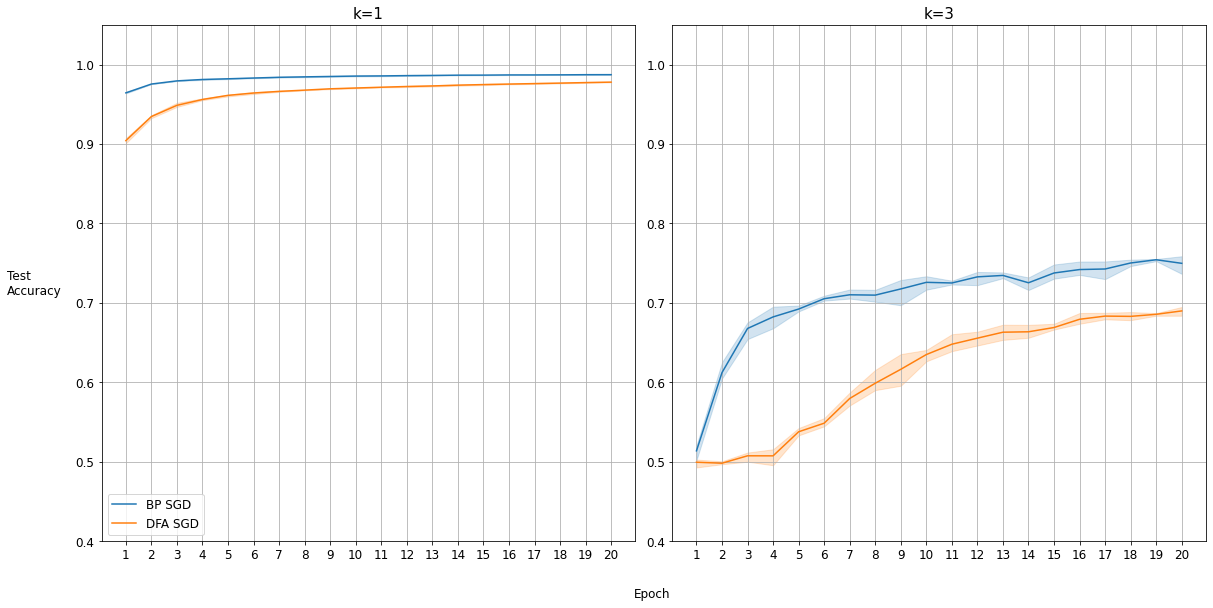

In [14]:
df_gen1 = pd.read_csv("runs/K1_SGD_BPDFA.csv")
df_gen3 = pd.read_csv("runs/K3_SGD_BPDFA.csv")

fig, (ax1,  ax3) = plt.subplots(1, 2, figsize=(16,8))

ax1 = sns.lineplot(data=df_gen1, x="epoch", y="BP SGD", label="BP SGD", ax=ax1)
ax1 = sns.lineplot(data=df_gen1, x="epoch", y="DFA SGD", label = "DFA SGD", ax=ax1)
ax1.set_ylim(0.40,1.05)
ax1.set_title("k=1", fontsize = 15)
ax1.set_ylabel("")
ax1.set_xlabel("")
ax1.set_xticks(range(1,21))
ax1.legend(loc = "lower left")
ax1.grid(True)


ax3 = sns.lineplot(data=df_gen3, x="epoch", y="BP SGD", ax=ax3)
ax3 = sns.lineplot(data=df_gen3, x="epoch", y="DFA SGD", ax=ax3)
ax3.set_ylim(0.40,1.05)
ax3.set_title("k=3", fontsize = 15)
ax3.set_ylabel("")
ax3.set_xlabel("")
ax3.set_xticks(range(1,21))
ax3.grid(True)

fig.tight_layout()
fig.supxlabel('Epoch', x = 0.51, y = -0.05, fontsize = 12)
fig.supylabel('Test \nAccuracy', fontsize=12, rotation=0, x = -0.05)
fig.savefig("plots/k13_SGD_DFAvsBP.svg");


In [ ]:
K = 3
num_epochs = 20
loss_type = "Binary Cross Entropy"

fig = plt.figure(figsize=(15,9))
for activation in ["BP SGD", "DFA SGD", "Adadelta BP", "Adadelta DFA"]:
    #print("Activation:",activation)
    if activation == "BP SGD":
        modelManual3 = MLPManual(K, best_manual_bp_sgd, loss_type, "BP", None, "SGD", device, measure_alignment, False)

    elif activation == "DFA SGD":
        modelManual3 = MLPManual(K, best_manual_dfa_sgd_uni, loss_type, "DFA", "uniform", "SGD", device, measure_alignment, False)

    trainLostList, trainAccList, valLossList, valAccList ,_,_,_  = train_model_manually(modelManual3, K, trainset, testset, loss_type, loss_fn, num_epochs,
                                                                                batch_size, momentum, nesterov_momentum, weight_decay, measure_alignment,
                                                                                validate_model = True, device=device)


    plotValAccuracy(valAccList, num_epochs, activation, K)

fig.tight_layout()
fig.savefig("plots/k3_best_SGD_delta_BP_DFA.png")
plt.show()
dataset = MNISTParity(trainset, K, 128)
dataset.plotRandomData()

### Compare BP and DFA with Adaptive methods

In [ ]:
k=3
model_bp_sgd = MLPManual(k, best_manual_bp_sgd, loss_type, "BP", None, "SGD", device, measure_alignment)
model_bp_adagrad = MLPManual(k, best_manual_bp_adagrad, loss_type, "BP", None, "Adagrad", device, measure_alignment)
model_bp_rmsprop = MLPManual(k, best_manual_bp_rmsprop, loss_type, "BP", None, "RMSProp", device, measure_alignment)
model_bp_adadelta = MLPManual(k, best_manual_bp_adadelta, loss_type, "BP", None, "Adadelta", device, measure_alignment)
model_bp_adam = MLPManual(k, best_manual_bp_adam, loss_type, "BP", None, "Adam", device, measure_alignment)

model_dfa_sgd = MLPManual(k, best_manual_dfa_sgd_uni, loss_type, "DFA", B_initialization, "SGD", device, measure_alignment)
model_dfa_adagrad = MLPManual(k, best_manual_dfa_adagrad_uni, loss_type, "DFA", B_initialization, "Adagrad", device, measure_alignment)
model_dfa_rmsprop = MLPManual(k, best_manual_dfa_rmsprop_uni, loss_type, "DFA", B_initialization, "RMSProp", device, measure_alignment)
model_dfa_adadelta = MLPManual(k, best_manual_dfa_adadelta_uni, loss_type, "DFA", B_initialization, "Adadelta", device, measure_alignment)
model_dfa_adam = MLPManual(k, best_manual_dfa_adam_uni, loss_type, "DFA", B_initialization, "Adam", device, measure_alignment)


df = pd.DataFrame(columns = ["Train_Method", "Optimizer", "Results"])
idx = 0
for model in [model_bp_sgd, model_bp_adagrad, model_bp_rmsprop, model_bp_adadelta, model_bp_adam, model_dfa_sgd, model_dfa_adagrad, model_dfa_rmsprop, model_dfa_adadelta, model_dfa_adam]:
    liste = getMeanStd(model,k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, 
                       momentum, nesterov_momentum, weight_decay, measure_alignment, True, device)
    train_Method = model.train_method
    optim = model.optim
    for value in liste:
        df.loc[idx,:] = [train_Method,optim,value]
        idx += 1

df["Error"] = df["Results"].apply(lambda x: 1-x)
df.to_csv("runs/k3_All.csv")

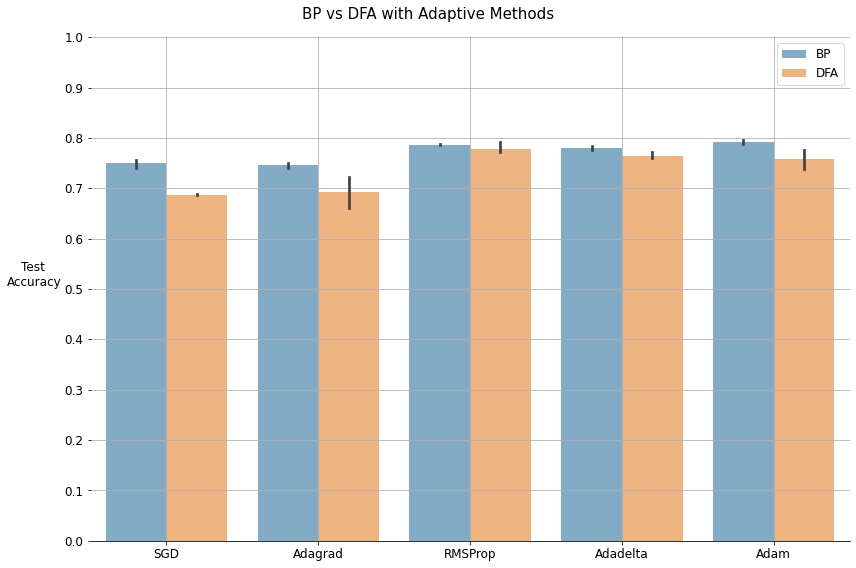

In [15]:
df = pd.read_csv("runs/k3_All.csv")

g = sns.catplot(
    data=df, kind="bar",
    x="Optimizer", y="Results", hue="Train_Method", alpha=.6, legend_out=False)
g.despine(left=True)
g.set_axis_labels("", "Test \nAccuracy", fontsize=12, rotation=0, labelpad=30)
g.fig.suptitle("BP vs DFA with Adaptive Methods", fontsize = 15)
g.legend.set_title("")
g.fig.set_size_inches(12,8)
plt.grid()
plt.ylim(0,1)
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.tight_layout()
g.savefig("plots/mainExperiment.svg")

### t-SNE Experiment

In [ ]:
k=1
optim = "SGD"
learn_rate = best_manual_bp_sgd
modelManual3 = MLPManual(k, learn_rate, loss_type, "BP", None, optim, device, measure_alignment, False)
trainLostList_sgd3_scratch, trainAccList_sgd3_scratch, \
valLossList_sgd3_scratch, valAccList_sgd3_scratch ,_,_,_  = train_model_manually(modelManual3, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, validate_model = True, device=device)

In [ ]:
trainData = MNISTParity(trainset, k, batch_size)
y_hat, a1, h1 =  modelManual3(trainData.data[:5000].to(device), modelManual3.w1, modelManual3.w2)
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(h1.cpu().detach().numpy()) 

In [ ]:
df = pd.DataFrame()
df["y"] = trainData.targets[:5000].numpy()
df["y_digits"] = trainData.original_target[:5000].numpy()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16,8))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df, ax= ax1).set(title="Hidden representation k=1, BP")
ax1.axis("off")

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y_digits.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="Hidden representation k=1 with Digits BP")

ax3.axis("off") 

#### k=3

In [ ]:
k=3
modelManual3 = MLPManual(k, best_manual_bp_sgd, loss_type, "BP", None, optim, device, measure_alignment, False)
trainLostList_sgd3_scratch, trainAccList_sgd3_scratch, \
valLossList_sgd3_scratch, valAccList_sgd3_scratch ,_,_,_  = train_model_manually(modelManual3, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, validate_model = True, device=device)

In [ ]:
k=3
modelManual3_dfa = MLPManual(k, best_manual_dfa_sgd_uni, loss_type, "DFA", "uniform", optim, device, measure_alignment, False)
trainLostList_sgd3_scratch, trainAccList_sgd3_scratch, \
valLossList_sgd3_scratch, valAccList_sgd3_scratch ,_,_,_  = train_model_manually(modelManual3_dfa, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, validate_model = True, device=device)

In [ ]:
trainData = MNISTParity(trainset, k, batch_size)
y_hat, a1, h1 = modelManual3(trainData.data[:7500].to(device), modelManual3.w1, modelManual3.w2)
y_hat_dfa, a1_dfa, h1_dfa = modelManual3_dfa(trainData.data[:7500].to(device), modelManual3_dfa.w1, modelManual3_dfa.w2)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(h1.cpu().detach().numpy())
z_dfa =  tsne.fit_transform(h1_dfa.cpu().detach().numpy())

In [ ]:
df = pd.DataFrame()
df["y"] = trainData.targets[:7500].numpy()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-1_dfa"] = z_dfa[:,0]
df["comp-2_dfa"] = z_dfa[:,1]


fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16,8))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df, ax= ax1).set(title="BP")
ax1.axis("off")
ax1.legend().set_visible(False)

sns.scatterplot(x="comp-1_dfa", y="comp-2_dfa", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df, ax= ax3).set(title="DFA")

ax3.legend(loc = "lower left", bbox_to_anchor=(-0.18,0.0))
ax3.axis("off") 
plt.suptitle("Hidden Representations");

In [ ]:
W1 = modelManual3.w1
W1_dfa = modelManual3_dfa.w1

In [ ]:
w01 = getW1ForImage(0,W1).cpu() # for example this is the weight matrix for left image
w11 = getW1ForImage(1,W1).cpu()
w21 = getW1ForImage(2,W1).cpu()

w01_dfa = getW1ForImage(0,W1_dfa).cpu() # for example this is the weight matrix for left image
w11_dfa = getW1ForImage(1,W1_dfa).cpu()
w21_dfa = getW1ForImage(2,W1_dfa).cpu()

In [ ]:
# get the hidden representations for each image
hidList = []
hidList_dfa = []
for data in trainData.data[:7500]:
    im1 = torch.flatten(data[:,0:28])
    im2 = torch.flatten(data[:,28:56])
    im3 = torch.flatten(data[:,56:84])

    hid1 = torch.matmul(im1,w01)
    hid2 = torch.matmul(im2,w11)
    hid3 = torch.matmul(im3,w21)
    hidList.append(torch.vstack([hid1,hid2,hid3]))

    hid1 = torch.matmul(im1,w01_dfa)
    hid2 = torch.matmul(im2,w11_dfa)
    hid3 = torch.matmul(im3,w21_dfa)
    hidList_dfa.append(torch.vstack([hid1,hid2,hid3]))

data = torch.vstack(hidList)
data_dfa = torch.vstack(hidList_dfa)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(data.numpy())
z_dfa = tsne.fit_transform(data_dfa.numpy())  

In [ ]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-1_dfa"] = z_dfa[:,0]
df["comp-2_dfa"] = z_dfa[:,1]

df["y"] = torch.hstack([trainData.left_target[:7500], trainData.middle_target[:7500], trainData.right_target[:7500]]).numpy()

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16,8))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df, ax= ax1).set(title="BP")
ax1.axis("off")
ax1.legend().set_visible(False)

sns.scatterplot(x="comp-1_dfa", y="comp-2_dfa", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df, ax= ax3).set(title="DFA")
ax3.legend(loc = "lower left", bbox_to_anchor=(-0.18,0.0)) 
ax3.axis("off")
plt.suptitle("Hidden Representations")
plt.savefig("plots/hidden.png")

In [ ]:
# just need to change the labels to binary
df["y"] = torch.hstack([trainData.left_target[:7500]%2, trainData.middle_target[:7500]%2, trainData.right_target[:7500]%2]).numpy()

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16,8))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df, ax= ax1).set(title="BP")
ax1.axis("off")
ax1.legend().set_visible(False)

sns.scatterplot(x="comp-1_dfa", y="comp-2_dfa", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df, ax= ax3).set(title="DFA")

ax3.legend(loc = "lower left", bbox_to_anchor=(-0.18,0.0))
ax3.axis("off") 
plt.suptitle("Hidden Representations");